#### Import Dependencies

In [1]:
# define keys and dependencies: 
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

#### Set the path to the data file

In [2]:
# Obtaining the data from Co2_data Csv:
f_path=os.path.join("CO2_data.csv")
Co2_Emissions=pd.read_csv(f_path)
Co2_Emissions.head(100)

,country,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
0,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7663783.0,NaN
1,Afghanistan,1950,0.084,475.000,0.070,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752000.0,1.949480e+10
2,Afghanistan,1951,0.092,8.696,0.007,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840000.0,2.006385e+10
3,Afghanistan,1952,0.092,0.000,0.000,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7936000.0,2.074235e+10
4,Afghanistan,1953,0.106,16.000,0.015,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8040000.0,2.201546e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Africa,1776,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,Africa,1777,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Africa,1778,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Africa,1779,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### List all the columns in the table

In [3]:
# Defining you columns to narrow your area of analysis:
Co2_Emissions.columns

Index(['country', 'year', 'co2', 'co2_growth_prct', 'co2_growth_abs',
       'consumption_co2', 'trade_co2', 'trade_co2_share', 'co2_per_capita',
       'consumption_co2_per_capita', 'share_global_co2', 'cumulative_co2',
       'share_global_cumulative_co2', 'co2_per_gdp', 'consumption_co2_per_gdp',
       'co2_per_unit_energy', 'cement_co2', 'coal_co2', 'flaring_co2',
       'gas_co2', 'oil_co2', 'cement_co2_per_capita', 'coal_co2_per_capita',
       'flaring_co2_per_capita', 'gas_co2_per_capita', 'oil_co2_per_capita',
       'total_ghg', 'ghg_per_capita', 'methane', 'methane_per_capita',
       'nitrous_oxide', 'nitrous_oxide_per_capita',
       'primary_energy_consumption', 'energy_per_capita', 'energy_per_gdp',
       'population', 'gdp'],
      dtype='object')

#### New table that contains the columns within the area of interest analysis 

In [4]:
# Check for Null Values and create a new data frame: 
Co2_Emissions.isnull().any()
Co2_Emissions.count()
Co2_Emissions_df=Co2_Emissions[["country","year","co2_growth_prct","consumption_co2","cumulative_co2","total_ghg",'ghg_per_capita', 'methane', 'methane_per_capita',
       'nitrous_oxide', 'nitrous_oxide_per_capita','primary_energy_consumption',"co2_growth_abs", 'energy_per_capita',"co2_per_capita",'population']]
Co2_Emissions_df=Co2_Emissions_df.loc[Co2_Emissions_df["year"] >=1980]
Co2_Emissions_df=Co2_Emissions_df.reset_index()
del Co2_Emissions_df["index"]

In [5]:
Co2_Emissions_df.groupby("country").count()
Co2_Emissions_df

,country,year,co2_growth_prct,consumption_co2,cumulative_co2,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,co2_growth_abs,energy_per_capita,co2_per_capita,population
0,Afghanistan,1980,-21.383,NaN,31.814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.478,NaN,0.0,13357000.0
1,Afghanistan,1981,12.655,NaN,33.793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.222,NaN,0.0,13172000.0
2,Afghanistan,1982,5.869,NaN,35.888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.116,NaN,0.0,12883000.0
3,Afghanistan,1983,20.260,NaN,38.409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.425,NaN,0.0,12538000.0
4,Afghanistan,1984,11.996,NaN,41.231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.302,NaN,0.0,12204000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9438,Zimbabwe,2014,2.838,12.760,671.105,66.10,4.865,11.24,0.827,6.27,0.461,NaN,0.330,NaN,0.0,13587000.0
9439,Zimbabwe,2015,1.685,13.010,683.268,67.49,4.885,11.87,0.859,6.68,0.484,NaN,0.202,NaN,0.0,13815000.0
9440,Zimbabwe,2016,-11.146,11.809,694.076,65.98,4.703,11.92,0.850,6.55,0.467,NaN,-1.356,NaN,0.0,14030000.0
9441,Zimbabwe,2017,11.274,12.531,706.102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.218,NaN,0.0,14237000.0


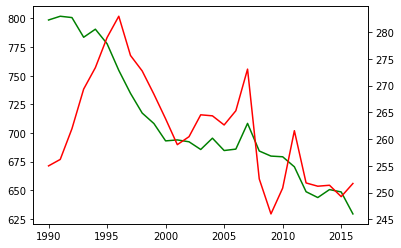

In [98]:
# Analyzing Co2 and GHG by country
Co2_Emissions_USA=Co2_Emissions_df[Co2_Emissions_df.country=="United States"]
Co2_Emissions_USA=Co2_Emissions_USA.reset_index(drop=True)
fig,ax=plt.subplots()
ax.plot(Co2_Emissions_USA.year,Co2_Emissions_USA.methane,color="green")
ax2=ax.twinx()
ax2.plot(Co2_Emissions_USA.year,Co2_Emissions_USA.nitrous_oxide,color="red")

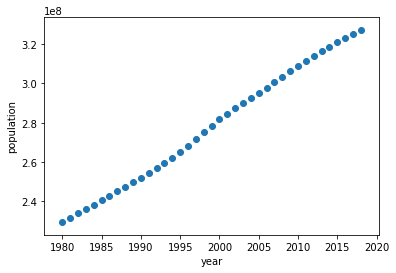

In [116]:
Co2_Emissions_USA=Co2_Emissions_df[Co2_Emissions_df.country=="United States"]
Co2_Emissions_USA=Co2_Emissions_USA.reset_index(drop=True)
Co2_Emissions_USA_chart=Co2_Emissions_USA.plot.line(x='year', y='',color="blue",alpha=0.5)
x=Co2_Emissions_USA["year"]
y=Co2_Emissions_USA["population"]
plt.scatter(x, y)

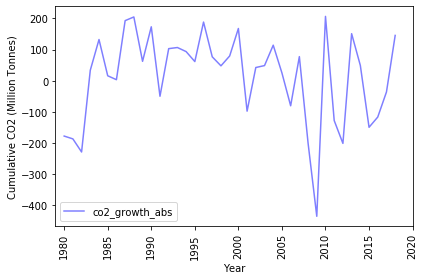

In [114]:
Co2_Emissions_USA=Co2_Emissions_df[Co2_Emissions_df.country=="United States"]
Co2_Emissions_USA=Co2_Emissions_USA.reset_index(drop=True)
Co2_Emissions_USA_chart=Co2_Emissions_USA.plot.line(x='year', y='co2_growth_abs',color="blue",alpha=0.5)
plt.xlabel("Year")
plt.xlim(1979,2020)
plt.ylabel("Cumulative CO2 (Million Tonnes)")

plt.xticks(rotation=90)
plt.tight_layout()